In [57]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from matplotlib.ticker import ScalarFormatter, MultipleLocator


data = pd.read_csv('../results/occupation/unseen_data.csv', index_col=0)
list(set(data.region_name))


# Filter data for France region
data = data[data['region_name'] == 'France']


,N_est,lower,upper,decade,region_name,model_type,count_cps
209,12.596246,9.794784,15.674840,-100,France,base_model,3
210,4.630812,3.693873,5.647481,-50,France,base_model,1
211,4.334122,3.387565,5.413833,100,France,base_model,1
212,3.865941,3.081719,4.724035,160,France,base_model,1
213,5.650956,4.682347,6.720146,400,France,base_model,2
...,...,...,...,...,...,...,...
312,7060.743553,6787.750582,7344.202622,1820,France,base_model,907
313,7653.701574,7361.977330,7954.366673,1830,France,base_model,985
314,13202.109266,12690.663024,13728.592235,1840,France,base_model,1707
315,12889.963165,12354.661117,13443.183821,1850,France,base_model,1673


,N_est,lower,upper,decade,region_name,model_type,count_cps


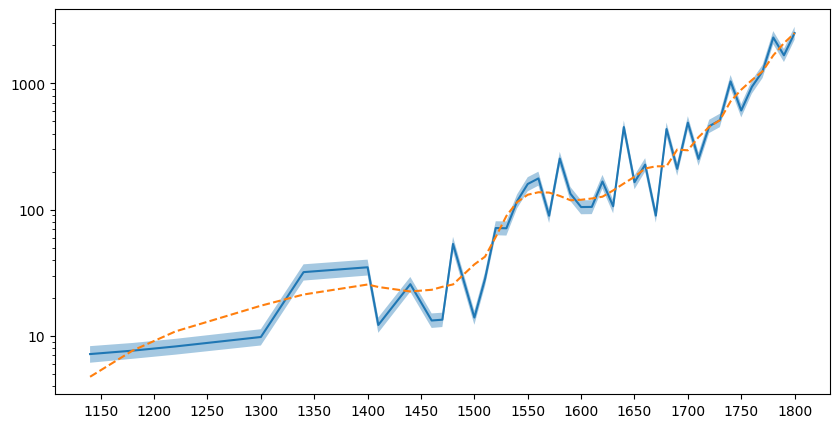

In [54]:




data_filtered = data[data['decade'] >= 900]
data_filtered = data_filtered[data_filtered['decade'] <= 1800]

# Calculate growth rate every decade
data_filtered['growth_rate'] = data_filtered['N_est'].pct_change() * 100
data = data.dropna()

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(data_filtered['decade'], data_filtered['N_est'])
ax.fill_between(data_filtered['decade'], data_filtered['lower'], data_filtered['upper'], alpha=0.4)
ax.xaxis.set_major_locator(MultipleLocator(50))
ax.set_yscale('log')
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))


# Add lowess smooth with more volatility
lowess = sm.nonparametric.lowess(data_filtered['N_est'], data_filtered['decade'], frac=0.2)
ax.plot(data_filtered['decade'], lowess[:, 1], linestyle='--')

plt.show()





In [ ]:
import statsmodels.api as sm

# Calculate lowess regression
lowess = sm.nonparametric.lowess(data_filtered['growth_rate'], data_filtered['decade'], frac=0.05)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(data_filtered['decade'], data_filtered['growth_rate'])
ax.plot(lowess[:, 0], lowess[:, 1], color='red', linewidth=2)  # Add lowess regression line
ax.xaxis.set_major_locator(MultipleLocator(50))
plt.show()
